In [2]:
import pandas as pd
weather = pd.read_csv("aus_weather_data/WeatherTrainingData.csv", index_col="row ID")
weather

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
row ID,,,,,,,,,,,,,,,,,,,,,
Row0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
Row1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
Row2,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0
Row3,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0
Row4,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Row101816,Uluru,8.0,20.7,0.0,NaN,NaN,ESE,41.0,SE,E,...,56.0,32.0,1028.1,1024.3,NaN,7.0,11.6,20.0,No,0
Row101817,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0
Row101818,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0


In [3]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

In [5]:
null_pct

Location         0.000000
MinTemp          0.004452
MaxTemp          0.002311
Rainfall         0.009838
Evaporation      0.427379
Sunshine         0.475471
WindGustDir      0.065527
WindGustSpeed    0.065115
WindDir9am       0.070401
WindDir3pm       0.026609
WindSpeed9am     0.009395
WindSpeed3pm     0.018439
Humidity9am      0.012390
Humidity3pm      0.025182
Pressure9am      0.097954
Pressure3pm      0.097834
Cloud9am         0.377547
Cloud3pm         0.401966
Temp9am          0.006170
Temp3pm          0.019133
RainToday        0.009838
RainTomorrow     0.000000
dtype: float64

In [4]:
weather.apply(pd.isnull).sum()

Location             0
MinTemp            443
MaxTemp            230
Rainfall           979
Evaporation      42531
Sunshine         47317
WindGustDir       6521
WindGustSpeed     6480
WindDir9am        7006
WindDir3pm        2648
WindSpeed9am       935
WindSpeed3pm      1835
Humidity9am       1233
Humidity3pm       2506
Pressure9am       9748
Pressure3pm       9736
Cloud9am         37572
Cloud3pm         40002
Temp9am            614
Temp3pm           1904
RainToday          979
RainTomorrow         0
dtype: int64

In [6]:
valid_columns = weather.columns[null_pct < 0.05]
valid_columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
weather = weather[valid_columns].copy()

In [8]:
weather

,Location,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
row ID,,,,,,,,,,,,,
Row0,Albury,13.4,22.9,0.6,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,0
Row1,Albury,7.4,25.1,0.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,0
Row2,Albury,17.5,32.3,1.0,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,0
Row3,Albury,14.6,29.7,0.2,W,19.0,24.0,55.0,23.0,20.6,28.9,No,0
Row4,Albury,7.7,26.7,0.0,W,6.0,17.0,48.0,19.0,16.3,25.5,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Row101816,Uluru,8.0,20.7,0.0,E,19.0,26.0,56.0,32.0,11.6,20.0,No,0
Row101817,Uluru,3.5,21.8,0.0,E,15.0,13.0,59.0,27.0,9.4,20.9,No,0
Row101818,Uluru,2.8,23.4,0.0,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,0


In [10]:
weather = weather.ffill()
weather.apply(pd.isnull).sum()

Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
WindDir3pm      0
WindSpeed9am    0
WindSpeed3pm    0
Humidity9am     0
Humidity3pm     0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [13]:
weather.dtypes


Location         object
MinTemp         float64
MaxTemp         float64
Rainfall        float64
WindDir3pm       object
WindSpeed9am    float64
WindSpeed3pm    float64
Humidity9am     float64
Humidity3pm     float64
Temp9am         float64
Temp3pm         float64
RainToday        object
RainTomorrow      int64
dtype: object

In [14]:
weather.Location.value_counts().sort_index()

Location
Adelaide            2178
Albany              2051
Albury              2142
AliceSprings        2119
BadgerysCreek       2041
Ballarat            2122
Bendigo             2110
Brisbane            2202
Cairns              2101
Canberra            2393
Cobar               2090
CoffsHarbour        2066
Dartmoor            2067
Darwin              2217
GoldCoast           2057
Hobart              2239
Katherine           1065
Launceston          2072
Melbourne           1695
MelbourneAirport    2139
Mildura             2124
Moree               2020
MountGambier        2140
MountGinini         2025
Newcastle           2096
Nhil                1136
NorahHead           2028
NorfolkIsland       2038
Nuriootpa           2110
PearceRAAF          1953
Penrith             2059
Perth               2262
PerthAirport        2167
Portland            2113
Richmond            2060
Sale                2093
SalmonGums          2031
Sydney              2361
SydneyAirport       2100
Townsville      

<Axes: xlabel='row ID'>

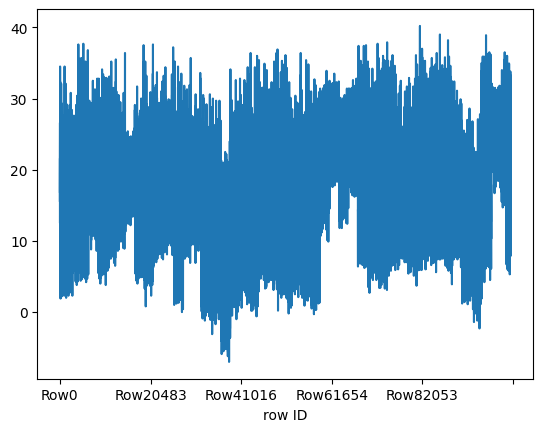

In [15]:
weather["Temp9am"].plot()

<Axes: xlabel='row ID'>

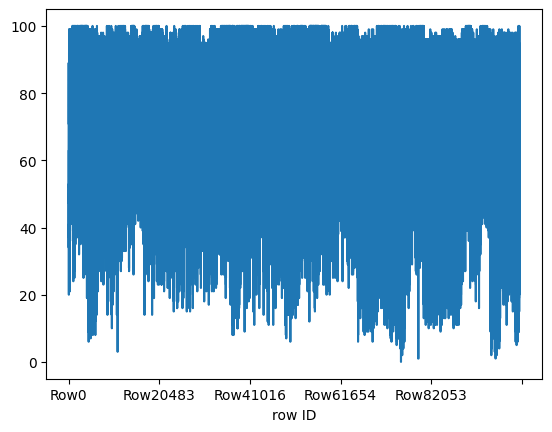

In [17]:
weather["Humidity9am"].plot()